In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from utils import linear, data_fit

In [20]:
data = pd.read_csv('./data/calibration.csv')

In [22]:
params_i = [1, 0]
params, params_err, chisq, dof = data_fit(
    params_i, linear, 
    data['centroid'], data['energy'], np.ones_like(data['energy'])
)

linspace = np.linspace(data['centroid'].min(), data['centroid'].max(), num=1000)
curve = linear(params, linspace)


Converged with chi-squared 54.63
Number of degrees of freedom, dof = 3.00
Reduced chi-squared 18.21

Parameter # | Initial guess values:    | Best fit values:         | Uncertainties in the best fit values:
0           | 1.000e+00                | 1.878e+00                | 2.488e-03               
1           | 0.000e+00                | -1.755e+01               | 1.409e+00               


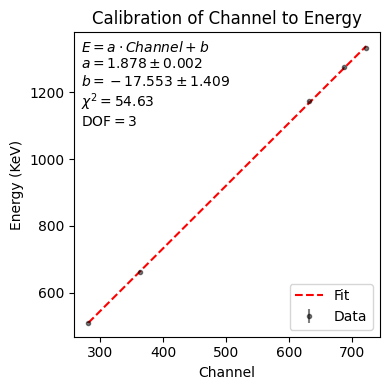

In [23]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.errorbar(
    data['centroid'], 
    data['energy'], 
    np.ones_like(data['energy']), 
    fmt='k.', alpha=0.5,
    label='Data'
)
ax.plot(linspace, curve, linestyle='dashed', color='r', label='Fit')

ax.set_title('Calibration of Channel to Energy')
ax.set_xlabel('Channel')
ax.set_ylabel('Energy (KeV)')

txt = '$E = a \cdot Channel +b$\n'
txt += f'$a = {params[0]:.3f} \\pm {params_err[0]:.3f}$ \n'
txt += f'$b = {params[1]:.3f} \\pm {params_err[1]:.3f}$ \n'
txt += f'$\\chi^2 = {chisq:.2f}$ \n'
txt += f'DOF$ = {dof}$'
ax.text(0.02, 0.975, txt, transform=ax.transAxes , fontsize=10, va='top')

ax.legend(loc='lower right')

plt.tight_layout()